# Présentation générale du jeu de données

Installation des différents packages :

requirement.txt

Chargement de la librairie Panda qui permet de manipuler des données dans des dataframes notamment

In [217]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import folium
import json

import de nos données csv

In [425]:
data = pd.read_csv("p2-arbres-fr.csv", sep=";")

Visualisation des 5 premieres lignes de notre jeu de données

In [3]:
data.head(5)

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [16]:
data.tail(5)

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
200132,2024741,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170151,NaN,Castanea,fargesii,NaN,0,0,NaN,0.0,48.821957,2.456264
200133,2024742,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170152,Arbre aux mouchoirs,Davidia,involucrata,NaN,0,0,NaN,0.0,48.823254,2.457935
200134,2024743,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170153,Peuplier,Populus,simonii,NaN,0,0,NaN,0.0,48.822907,2.457970
200135,2024744,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170154,Chêne,Quercus,n. sp.,NaN,0,0,NaN,0.0,48.822522,2.455956
200136,2024745,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170155,Raisinier,Hovenia,dulcis,NaN,0,0,NaN,0.0,48.820445,2.454856


Nous remarquons que la variable type_emplacement semble avoir une seule données. 

In [456]:
data.type_emplacement.unique()

array(['Arbre'], dtype=object)

Nous avons une seule données pour cette variable. Nous pouvons la supprimer, elle n'apporte aucune information

In [457]:
del data['type_emplacement']

Nous remarquons aussi qu'il y a des données en minuscule et en majuscule. Nous allons donc mettre tout nos libellés en majuscule afin toutes nos données soient au même format et faciliter la détection d'éventuelle doublons.

In [531]:
data = data.applymap(lambda s:s.upper() if type(s) == str else s)

Regardons le nombre de lignes et le nombre de colonnes du jeu de données

In [535]:
data.shape

(152419, 15)

Nous avons une population de 200 137 arbres et 18 colonnes. 

Regardons s'il y a des doublons (lignes identiques)

In [536]:
data.duplicated().sum()

0

Nous n'avons pas de doublons.

Regardons les types des colonnes et le nombre de lignes non vides

In [537]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152419 entries, 0 to 198878
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   152419 non-null  int64  
 1   domanialite          152418 non-null  object 
 2   arrondissement       152419 non-null  object 
 3   lieu                 152419 non-null  object 
 4   id_emplacement       152419 non-null  object 
 5   libelle_francais     151242 non-null  object 
 6   genre                152419 non-null  object 
 7   espece               152419 non-null  object 
 8   circonference_cm     152419 non-null  int64  
 9   stade_developpement  114518 non-null  object 
 10  remarquable          112479 non-null  object 
 11  geo_point_2d_a       152419 non-null  float64
 12  geo_point_2d_b       152419 non-null  float64
 13  hauteur_cm           152419 non-null  int64  
 14  arrondissement_num   152419 non-null  int64  
dtypes: float64(2), in

Nous observons qu'il y a des données manquantes dans certaines variables comme complement_addresse et variete.

Regardons plus en détail les données manquantes.

Pour commencer, nous pouvons regarder par exemple les colonnes ayant plus de 80% de données manquantes.

In [426]:
def del_Nan(data, seuil, delete, all_freq):
    tab = pd.isnull(data).sum()/len(data.id)
    s=tab.to_frame(name='freq').reset_index()
    if all_freq==0:
        print(s[s['freq']>=seuil])
    else:
        print(s)
    if delete==1:
        s=s[s['freq']>=seuil]
        col_del=list(s['index'])
        data=data.drop(list(s['index']), axis=1, inplace=True)
        print("Columns deleted : ", col_del)

In [427]:
del_Nan(data, 0.8,0,0)

                  index      freq
4   complement_addresse  0.845596
5                numero  1.000000
11              variete  0.816241


On voit que la colonne "numero" n'a pas de données. 
La colonne complément d'adresse n'a que très peu de données renseignées mais ceci parait logique. Nous avons les coordonnées des points. Donc il ne semble pas utile de conserver ces deux colonnes.
La colonne variété a aussi plus de 80% de données vides. Il ne semble pas très pertinent de la conserver sachant qu'on a déjà des informations sur le genre, l'espèce et le nom de l'arbre. La variété n'est qu'un détail supplémentaire. Nous pouvons donc aussi supprimer cette colonne.


In [428]:
del_Nan(data, 0.8,1,0)

                  index      freq
4   complement_addresse  0.845596
5                numero  1.000000
11              variete  0.816241
Columns deleted :  ['complement_addresse', 'numero', 'variete']


Regardons plus précisément les valeurs manquantes des autres colonnes ne dépassant pas le seuil. Traçons une matrice.

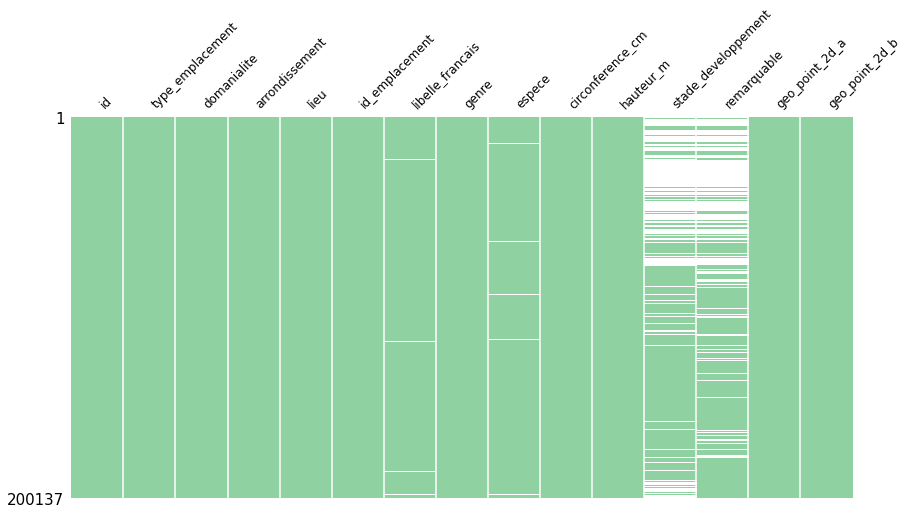

In [422]:
missingno.matrix(data, figsize=(14,7), fontsize=12, color=(0.564, 0.823, 0.631), sparkline=False);

Il manque quelques données concernant la colonne "libelle_francais" qui est le nom de l'arbre, de même pour la colonne "espèce", mais nous avons le genre. Nous pouvons pour l'instant conserver ces données.

Il manque aussi beaucoup de données sur les colonnes stade_developpement et sur la colonne remarquable.
Regardons les valeurs uniques de ces colonnes

Commençons par la colonne "remarquable"

In [24]:
data.remarquable.unique()

array([ 0., nan,  1.])

Les arbres remarquables de France sont des arbres vivants exceptionnels
par leur âge, leurs dimensions, leur forme, leur passé ou encore leur légende

Il convient peut être de traiter différement les arbres remarquables des autres. Si nous n'avons pas d'information, nous considerons que l'arbre n'est pas remarquable.

In [221]:
data['remarquable'].fillna(0, inplace=True)

On vérifie la correction des valeurs manquantes pour la colonne "remarquable"

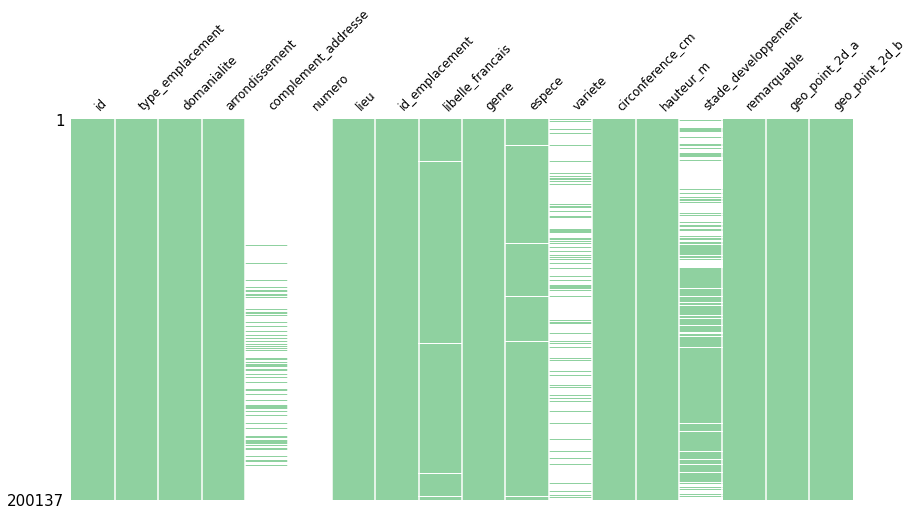

In [26]:
missingno.matrix(data, figsize=(14,7), fontsize=12, color=(0.564, 0.823, 0.631), sparkline=False);

Regardons la colonne stade_developpement

In [32]:
data.stade_developpement.unique()

array([nan, 'A', 'J', 'M', 'JA'], dtype=object)

On a les choix adulte, jeune, mature, jeune adulte.
Regardons le % de données que nous avons

In [34]:
data.stade_developpement.describe()

count     132932
unique         4
top            A
freq       64438
Name: stade_developpement, dtype: object

Nous avons 66% environs des données remplies. Nous conservons la colonne telle quelle.

# Démarche méthodologique d’analyse de données 

vérifier les données manquantes
vérifier les données dites aberrantes
regarder les tendances centrales : moyenne, mediane...
la dispersion : variance, ecart-type..
la forme des données: asymetrie...
regarder les correlations ? stats bi variée ?

Maintenant que nous avons traité les doublons et les valeurs manquantes. Nous allons étudier nos variables quantitatives : circonference_cm et hauteur_m.

## 1) Etude des variables quantitatives

Le but ici est d'étudier chaque variable afin de découvrir les informations qu'elles peuvent nous apporter et de detecter les éventuelles valeurs anodines dites "valeurs aberrantes"

Regardons nos variables quantitatives de manière générale.

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   lieu                 200137 non-null  object 
 5   id_emplacement       200137 non-null  object 
 6   libelle_francais     198640 non-null  object 
 7   genre                200121 non-null  object 
 8   espece               198385 non-null  object 
 9   circonference_cm     200137 non-null  int64  
 10  hauteur_m            200137 non-null  int64  
 11  stade_developpement  132932 non-null  object 
 12  remarquable          200137 non-null  float64
 13  geo_point_2d_a       200137 non-null  float64
 14  geo_point_2d_b       200137 non-null  float64
dtypes: float64(3), in

Nous observons deux colonnes quantitatives à prendre en compte : circonference_cm et hauteur_m.
Commençons par mettre ces deux colonnes sur la même échelle.
Nous décidons de convertir la hauteur en cm afin d'éviter d'avoir des chiffres proche de 0 pour la colonne circonference_cm.

In [439]:
data["hauteur_cm"] = data["hauteur_m"]*100
del data["hauteur_m"]

In [437]:
data[["circonference_cm", "hauteur_cm"]].describe().round(2)

,circonference_cm,hauteur_cm
count,200137.00,200137.00
mean,83.38,1311.05
std,673.19,197121.74
min,0.00,0.00
25%,30.00,500.00
50%,70.00,800.00
75%,115.00,1200.00
max,250255.00,88181800.00


On voit qu'en moyenne un arbre a une circonference de 83 cm et une hauteur de 13 mètres.
50% des arbres ont au moins une circonférence de 70 cm et 50% des arbres ont au moins une hauteur de 8 mètre.
Les données semblent très dispersées pour ces deux colonnes, il convient de vérifier s'ils n'existent pas de données aberrantes. En effet, nous voyons que les maximum pour ces deux variables sont très important. 
Vérifions cela en traçant les boites à moustache.

Text(0.5, 1.0, 'Boite à moustache - "Circonference_cm"')

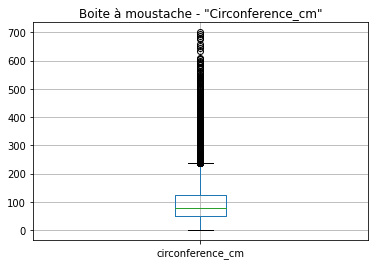

In [106]:
data.boxplot(column="circonference_cm").set_title('Boite à moustache - "Circonference_cm"')

On observe des valeurs très extrêmes. 
Si on fait une recherche sur internet, on sait que :
L'arbre avec la plus grande circonférence connue aujourd'hui à Paris est un platane d’Orient du Parc Monceau.
son tronc mesure 7 mètres de circonférence pour une hauteur de 31 mètres environ.
info sur : https://www.unjourdeplusaparis.com/paris-vert/arbres-remarquables-paris
Nous pouvons supprimer les données supérieurs à 701 cm.

In [447]:
data = data.loc[data["circonference_cm"] <= 701]

Retraçons la boite à moustache.

Text(0.5, 1.0, 'Boîte à moustache - "Circonference_cm"')

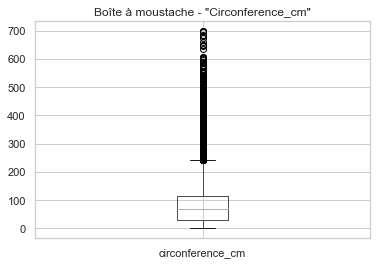

In [383]:
data.boxplot(column="circonference_cm" ).set_title('Boîte à moustache - "Circonference_cm"')

Nous observons encore des données qui sortent de l'ordinaire mais elles sont cohérentes. Nous les conservons pour ne pas perdre d'informations.

Nous observons que le minimum est 0. Ceci parait étonnant qu'un arbre ne puisse pas avoir de circonférence. 
Nous ne trouvons pas de données sur internet concernant l'arbre le plus fin à Paris.
Nous pouvons utiliser la formule de IQR pour supprimer les données dites "aberrantes".

In [390]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    print(np.quantile(s, 0.25))
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)

In [391]:
outliers(data.circonference_cm)

30.0


,sub,values
0,IQR,85.000000
1,Upper Bound,242.500000
2,Lower Bound,-97.500000
3,Sum outliers,3327.000000
4,percentage outliers,1.663317


Concernant la valeur 0 de l'arbre le plus fin, selon la formule du IQR, on n'a pas de valeur aberrante.
Nous allons donc simplement supprimer les données à 0 qui ne sont pas possible pour un arbre.

In [446]:
data = data.loc[data["circonference_cm"] > 0]

Recalculons nos statistiques descriptives.= et retraçons la boite à moustache sans les données aberrantes.

In [448]:
data["circonference_cm"].describe().round(2)

count    174188.00
mean         91.45
std          58.85
min           1.00
25%          45.00
50%          80.00
75%         122.00
max         700.00
Name: circonference_cm, dtype: float64

Text(0.5, 1.0, 'Boîte à moustache - "Circonference_cm"')

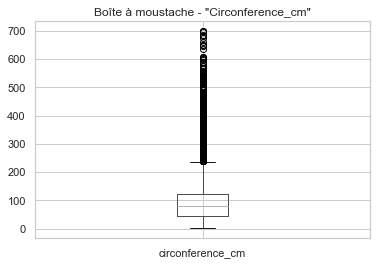

In [393]:
data.boxplot(column="circonference_cm" ).set_title('Boîte à moustache - "Circonference_cm"')

Nous observons que les valeurs sont peu dispersées, la boite à moustache est assez resserrée. De plus, l'écart-type est assez faible, il est de 58.85. 
Nous apprenons aussi que 50% des arbres à Paris ont une circonference au dessus de 80 cm. Mais, nous avons beaucoup de valeurs extrêmes. 25% des arbres ont une circonference au dessus de 122 cm.

Nous pouvons aussi vérifier si la distribution suit une loi normale grâce à un test.

In [395]:
scipy.stats.normaltest(data.circonference_cm)

NormaltestResult(statistic=43529.74434735392, pvalue=0.0)

Nous observons que la p-value est 0. Donc la distribution ne suit pas la loi normale.
Vérifions ceci avec le tracer de l'histogramme.

In [171]:
def graph_hist(var, bins_r, title_i, xmin,xmax, xscale, ymin, ymax, xlabel, ylabel):
    plt.hist(var,bins=bins_r)
    plt.title(title_i)
    plt.xlim(xmin, xmax, xscale)
    plt.ylim(ymin,ymax)
    # Etiquetage
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

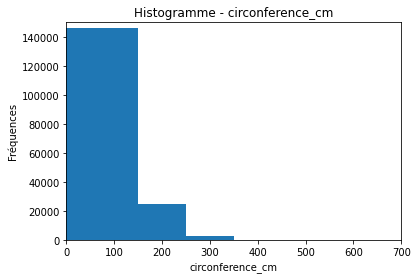

In [455]:
graph_hist(data.circonference_cm,[0,150,250,350,450,700], "Histogramme - circonference_cm", 
           0,700, 150, 0, 150000, 'circonference_cm', 'Fréquences')

On regarde que la distribution est plutot regroupée sur la gauche.
Il serait judicieux de faire des intervalles. On ajoute une colonne avec un reg_circonference_cm.

In [225]:
def reg_cir(x):
    if x<150:
        return "[0-150["
    elif x>150 and x<250:
        return "[150-250["
    elif x>=250:
        return "250 et plus"



In [226]:
data['reg_circonference_cm']=data.apply(lambda row: reg_cir(row.circonference_cm), axis=1)


In [206]:
data['reg_circonference_cm'].describe()

count      157512
unique          3
top       [0-150[
freq       133954
Name: reg_circonference_cm, dtype: object

Regardons à présent la variable hauteur_m

In [207]:
data['reg_circonference_cm'].value_counts(normalize=True)

[0-150[        0.850437
[150-250[      0.131933
250 et plus    0.017630
Name: reg_circonference_cm, dtype: float64

Ce regroupement semble cohérent.

<AxesSubplot:>

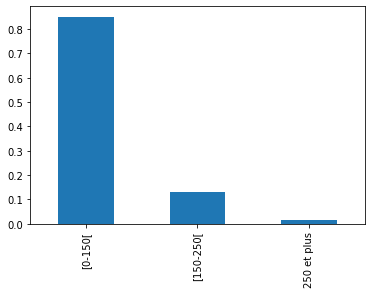

In [208]:
data['reg_circonference_cm'].value_counts(normalize=True).plot(kind='bar')

Etudions la variable hauteur_m. Faisons un violinplot.

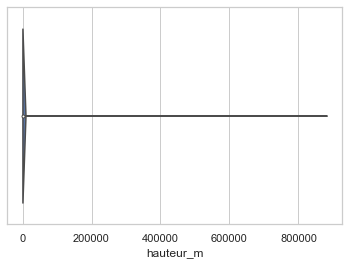

In [75]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=data["hauteur_m"])

Ici encore nous observons des valeurs aberrantes.
En effet, l'arbre le plus grand connu actuellement à Paris porte le nom de Séquoia. Il se trouve aux Buttes-Chaumont et mesure 35 mètres.
https://www.unjourdeplusaparis.com/paris-vert/arbres-remarquables-paris
Nous pouvons supprimer les données supérieures à 40 mètres.

In [227]:
data = data.loc[data["hauteur_m"] <= 40]

In [192]:
data["hauteur_m"].describe().round(2)

count    159996.00
mean         10.37
std           5.15
min           1.00
25%           6.00
50%          10.00
75%          14.00
max          40.00
Name: hauteur_m, dtype: float64

Le minimum est 0, ce qui n'est pas possible pour un arbre.
Regardons l'IQR.

In [401]:
outliers(data.hauteur_m)

5.0


,sub,values
0,IQR,8.00000
1,Upper Bound,25.00000
2,Lower Bound,-7.00000
3,Sum outliers,906.00000
4,percentage outliers,0.52155


Les données dites aberrantes sont celles inférieures à -7.
Nous pouvons donc uniquement supprimer les données à 0.

In [228]:
data = data.loc[data["hauteur_m"] > 0]

In [229]:
data["hauteur_m"].describe().round(2)

count    159996.00
mean         10.37
std           5.15
min           1.00
25%           6.00
50%          10.00
75%          14.00
max          40.00
Name: hauteur_m, dtype: float64

25 % des arbres ont une hauteur au dessus de 14 mètres.
L'ecart-type est de 5, les données sont peu dispersées.
Retraçons le boxplot

<AxesSubplot:>

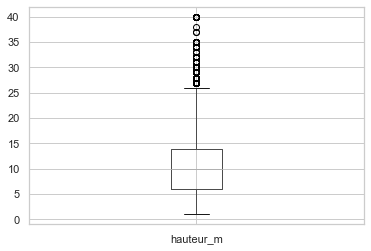

In [404]:
data.boxplot(column="hauteur_m" )

Nous pouvons donc confirmer que nos données sont peu dispersées. Même si nous avons des valeurs extrêmes.

In [405]:
scipy.stats.normaltest(data.hauteur_m)

NormaltestResult(statistic=15866.540147621814, pvalue=0.0)

<AxesSubplot:>

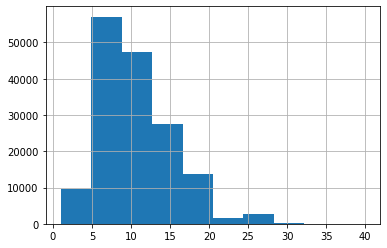

In [104]:
data.hauteur_m.hist()

Il serait judicieux de regrouper les données et de faire des intervalles afin quelles soient plus pertinentes.
Tout comme pour la variable circonference_cm, faisons un regroupement pour la variable hauteur_m. Creons une colonne Reg_hauteur_m.

In [230]:
def reg_haut(x):
    if x<10:
        return "[0-10["
    elif x>=10 and x<15:
        return "[10-15["
    elif x>=15 and x<20:
        return "[15-20["
    elif x>=20:
        return "20 et plus"


In [231]:
data['reg_hauteur_m']=data.apply(lambda row: reg_haut(row.hauteur_m), axis=1)

Regardons les proportions pour la nouvelle colonne.

In [232]:
data['reg_hauteur_m'].value_counts(normalize=True)

[0-10[        0.446330
[10-15[       0.309714
[15-20[       0.167985
20 et plus    0.075971
Name: reg_hauteur_m, dtype: float64

Ce regroupement semble convenable

<AxesSubplot:>

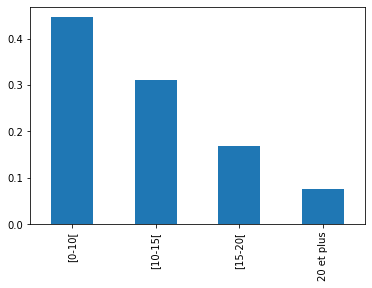

In [233]:
data["reg_hauteur_m"].value_counts(normalize=True).plot(kind='bar')

### Conclusion de l'étude sur les variables quantitatives

A retravailler

Nous avons pu détecter beaucoup de valeurs aberrantes que ce soit pour la variable circonference_cm que pour la variable "hauteur_m". Grâce au information sur les arbres de Paris que nous avons pu trouver sur le web, nous avons pu nettoyer nos données. Nous aurions pu utiliser l'écart-interquartile, mais il était moins pertinent, de même que sur les valeurs très basses.

Nos deux distributions ont une forme assez similaire, les données sont regroupées vers la gauche.
Nous avons donc pu les regrouper en intervalle afin que les données soient plus pertinentes.

Etudions à présent nos données qualitatives.

## 2) Analyses des variables qualitatives

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200086 entries, 0 to 200136
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200086 non-null  int64  
 1   domanialite          200085 non-null  object 
 2   arrondissement       200086 non-null  object 
 3   lieu                 200086 non-null  object 
 4   id_emplacement       200086 non-null  object 
 5   libelle_francais     198589 non-null  object 
 6   genre                200070 non-null  object 
 7   espece               198334 non-null  object 
 8   circonference_cm     200086 non-null  int64  
 9   hauteur_m            200086 non-null  int64  
 10  stade_developpement  132881 non-null  object 
 11  remarquable          200086 non-null  float64
 12  geo_point_2d_a       200086 non-null  float64
 13  geo_point_2d_b       200086 non-null  float64
dtypes: float64(3), int64(3), object(8)
memory usage: 22.9+ MB


data.type_emplacement.unique()
Nous avons une seule données pour cette variable.
Nous pouvons la supprimer, elle n'apporte aucune information.

In [61]:
del data['type_emplacement']

In [88]:
data[["domanialite", "arrondissement", "lieu", "libelle_francais", "genre", "espece", "remarquable"]].describe(include='all').round(2)

,domanialite,arrondissement,lieu,libelle_francais,genre,espece,remarquable
count,200085,200086,200086,198589,200070,198334,200086.00
unique,9,25,6921,192,175,539,NaN
top,Alignement,PARIS 15E ARRDT,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,Platane,Platanus,x hispanica,NaN
freq,104903,17149,2995,42490,42573,36400,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.00
std,NaN,NaN,NaN,NaN,NaN,NaN,0.03
min,NaN,NaN,NaN,NaN,NaN,NaN,0.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.00
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.00
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.00


Nous allons transformer la variable "remarquable" qui prend comme valeur 0/1 en oui/non.

In [529]:
data['remarquable'] = data['remarquable'].replace(0,'NON')
data['remarquable'] = data['remarquable'].replace(1,'OUI')

In [530]:
data[["domanialite", "arrondissement", "lieu", "libelle_francais", "genre", "espece", "remarquable"]].describe(include='all').round(2)

,domanialite,arrondissement,lieu,libelle_francais,genre,espece,remarquable
count,152418,152419,152419,151242,152419,152419,112479
unique,9,20,4338,179,156,23,2
top,Alignement,PARIS 16E ARRDT,PARC DES BUTTES CHAUMONT,Platane,Platanus,Autres,NON
freq,93719,16265,2309,37321,37397,33957,112296


<AxesSubplot:>

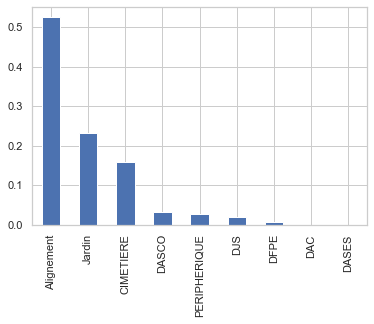

In [106]:
data["domanialite"].value_counts(normalize=True).plot(kind='bar')

Plus de 50% des arbres se trouve dans un alignement.
un peu plus de 20% se trouve dans des jardins et un peu moins de 20% dans des cimetières.
Les autres catégories sont très peu représentées. Il serait peut être judicieux de les regrouper dans une catégorie "Autres".

In [107]:
data["domanialite"].value_counts(normalize=True)

Alignement      0.524292
Jardin          0.231202
CIMETIERE       0.159557
DASCO           0.032086
PERIPHERIQUE    0.026624
DJS             0.019492
DFPE            0.006622
DAC             0.000105
DASES           0.000020
Name: domanialite, dtype: float64

In [235]:
replace_values = {'Alignement':'Alignement', 'Jardin':'Jardin','CIMETIERE':'CIMETIERE', 'DASCO' : 'Autres', 'PERIPHERIQUE' : 'Autres', 'DJS' : 'Autres', 'DFPE': 'Autres', 'DAC':'Autres', 'DASES':'Autres' }  

In [236]:
data['domanialite'] = data['domanialite'].map(replace_values)     

In [237]:
data["domanialite"].value_counts(normalize=True)

Alignement    0.622319
Jardin        0.168262
CIMETIERE     0.106353
Autres        0.103066
Name: domanialite, dtype: float64

In [66]:
max(data["lieu"].value_counts(normalize=True))


0.01018150453761344

In [67]:
min(data["lieu"].value_counts(normalize=True))

6.250156253906348e-06

Les données sont très dispersées dans les différentes catégories.
Pertinence ?

<AxesSubplot:>

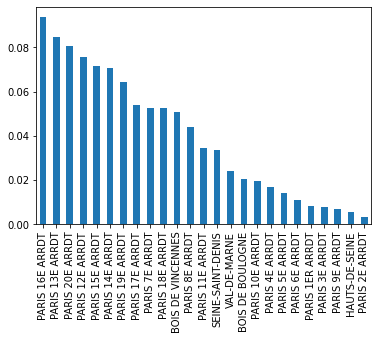

In [258]:
data["arrondissement"].value_counts(normalize=True).plot(kind='bar')

Nous observons des arbres qui ne se trouvent pas dans un arrondissement de Paris. On les supprime.

Il y a beaucoup plus d'arbre dans le 16eme arrondissemments de Paris (+8%)
Mais nous observons aussi que 24% des arbres se trouvent dans les arrondissements 16, 13 et 20.
Et il y a très peu d'arbre dans le 2ème arrondissement moins de 1%.

In [69]:
data["libelle_francais"].value_counts(normalize=True)

Platane         0.246982
Marronnier      0.143502
Tilleul         0.109796
Erable          0.078348
Sophora         0.065734
                  ...   
Grenadier       0.000006
Cordyline       0.000006
Papayer         0.000006
Poliothyrsis    0.000006
Idesia          0.000006
Name: libelle_francais, Length: 169, dtype: float64

In [70]:
data["libelle_francais"].value_counts(normalize=True).head(20)

Platane                 0.246982
Marronnier              0.143502
Tilleul                 0.109796
Erable                  0.078348
Sophora                 0.065734
Frêne                   0.021811
Micocoulier             0.020588
Peuplier                0.017909
Noisetier de Byzance    0.017366
Chêne                   0.017240
Pin                     0.017114
Poirier à fleurs        0.015936
Charme                  0.014914
Cerisier à fleurs       0.014568
Robinier                0.012179
Orme                    0.009764
If                      0.008340
Bouleau                 0.008138
Paulownia               0.007552
Faux-cyprès             0.007022
Name: libelle_francais, dtype: float64

On observe plusieurs sauts dont un entre ribinier et Orme.
nous pouvons regrouper les catégories qui représentent moins d'un pourcent des arbres.

In [238]:
info_lib=(data["libelle_francais"].value_counts(normalize=True)>0.01)

In [239]:
info_lib.value_counts(normalize=True)

False    0.911243
True     0.088757
Name: libelle_francais, dtype: float64

90% des catégories représentent moins de 1% les arbres.
Les données sont très dispersées.
On peut faire un regroupement Autres

In [240]:
info_lib=(data["libelle_francais"].value_counts(normalize=True)>0.01)

In [241]:
info_lib=list(info_lib.loc[info_lib== True].index)

In [242]:
def map_lib(lib):
    if lib in info_lib:
        return lib
    else:
        return "Autres"

In [243]:
data["libelle_francais"]=data["libelle_francais"].map(map_lib, na_action=None)

In [244]:
data["libelle_francais"]

0         Marronnier
1             Autres
2             Autres
3             Erable
7            Platane
             ...    
198874         Chêne
198875         Chêne
198876         Chêne
198877         Chêne
198878         Chêne
Name: libelle_francais, Length: 159996, dtype: object

In [245]:
data["libelle_francais"].value_counts(normalize=True)

Platane                 0.244887
Autres                  0.192917
Marronnier              0.142285
Tilleul                 0.108865
Erable                  0.077683
Sophora                 0.065177
Frêne                   0.021626
Micocoulier             0.020413
Peuplier                0.017757
Noisetier de Byzance    0.017219
Chêne                   0.017094
Pin                     0.016969
Poirier à fleurs        0.015800
Charme                  0.014788
Cerisier à fleurs       0.014444
Robinier                0.012075
Name: libelle_francais, dtype: float64

In [246]:
data["libelle_francais"].describe(include='all')

count      159996
unique         16
top       Platane
freq        39181
Name: libelle_francais, dtype: object

<AxesSubplot:>

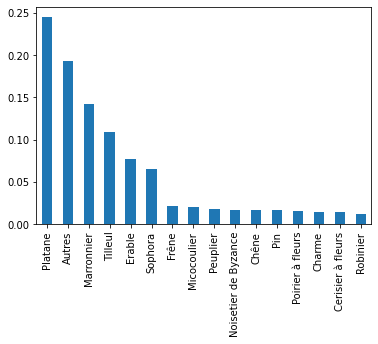

In [81]:
data["libelle_francais"].value_counts(normalize=True).plot(kind='bar')

on conserve 16 catégories.
A paris, il y a majoritairement des platanes et des marronniers. Mais on a 19% des arbres qui sont assez diversifiés.

In [88]:
data["genre"].value_counts(normalize=True).head(20)

Platanus    0.245375
Autres      0.154048
Aesculus    0.143116
Tilia       0.110365
Acer        0.078177
Sophora     0.065302
Prunus      0.031482
Fraxinus    0.025488
Celtis      0.020876
Pyrus       0.018763
Populus     0.017982
Corylus     0.017625
Quercus     0.017188
Pinus       0.017050
Carpinus    0.014932
Robinia     0.012150
Ulmus       0.010082
Name: genre, dtype: float64

In [247]:
info_g=(data["genre"].value_counts(normalize=True)>0.01)

In [248]:
info_g.value_counts(normalize=True)

False    0.890411
True     0.109589
Name: genre, dtype: float64

In [249]:
def map_lib(lib):
    if lib in info_g:
        return lib
    else:
        return "Autres"
    
info_g=(data["genre"].value_counts(normalize=True)>0.01)
info_g=list(info_g.loc[info_g== True].index)
data["genre"]=data["genre"].map(map_lib, na_action=None)

In [250]:
data["genre"].describe()

count       159996
unique          17
top       Platanus
freq         39259
Name: genre, dtype: object

<AxesSubplot:>

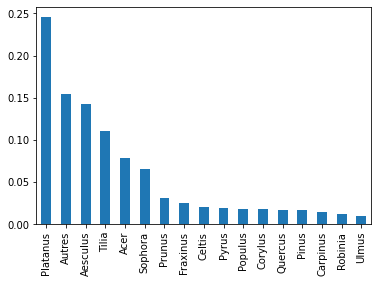

In [259]:
data["genre"].value_counts(normalize=True).plot(kind='bar')

L'analyse des genre est cohérente avec celle des noms des arbres. En effet, le genre d'arbre le plus répandu est "platanus".
Les deux variables apportent la même information. Il faudrait surement en conserver une seule car elles doivent être corrélées à 1. A vérifier lors de l'analyse bivariée.

In [252]:
data["espece"].value_counts(normalize=True).head(25)

x hispanica       0.213598
hippocastanum     0.113264
japonica          0.065691
tomentosa         0.051408
n. sp.            0.050425
platanoides       0.029530
pseudoplatanus    0.028522
x carnea          0.025581
x europaea        0.022804
nigra             0.022457
australis         0.020461
occidentalis      0.020373
cordata           0.019164
colurna           0.017407
excelsior         0.016015
calleryana        0.015058
betulus           0.014988
orientalis        0.013049
pseudoacacia      0.012142
platyphyllos      0.010725
serrulata         0.009062
baccata           0.008344
campestre         0.007186
alba              0.006657
sinensis          0.005939
Name: espece, dtype: float64

In [462]:
info_e=(data["espece"].value_counts(normalize=True)>0.01)
info_e.value_counts(normalize=True)

False    0.947991
True     0.052009
Name: espece, dtype: float64

In [463]:
def map_lib_e(lib):
    if lib in info_e:
        return lib
    else:
        return "Autres"
    
info_e=(data["espece"].value_counts(normalize=True)>0.01)
info_e=list(info_e.loc[info_e== True].index)
data["espece"]=data["espece"].map(map_lib_e, na_action=None)

In [465]:
data['espece'].describe()

count     174188
unique        23
top       Autres
freq       39426
Name: espece, dtype: object

<AxesSubplot:>

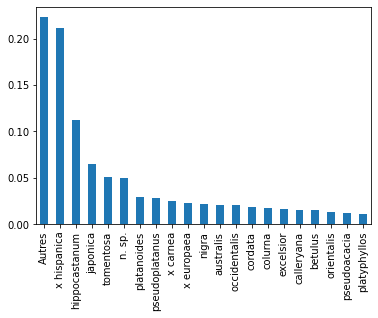

In [256]:
data["espece"].value_counts(normalize=True).plot(kind='bar')

Plus de 20% des arbres appartiennent à l'espèce x hispanica dont les arbres platanes font partie. La variable espèce est donc surement fortement corrélée avec les variables libellle_français et genre. Tout comme nous l'avons précisément précédement il convient de conserver une des 3 variables car elles apportent toute la même information. Il faudrait vérifier cette hypothèse avec l'analyse multivariée.

De plus, nous remarquons aussi qu'il y a beaucoup d'espèces diversifiés à Paris. La partie Autres représente plus de 20% des espèces.

Text(0.5, 1.0, 'Diagramme circulaire - Variable Remarquable')

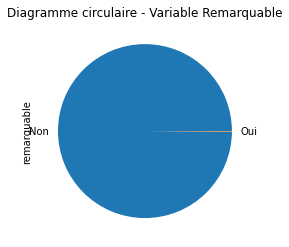

In [257]:
data["remarquable"].value_counts(normalize=True).plot(kind='pie').set_title("Diagramme circulaire - Variable Remarquable")

Il y a très peu d'arbres remarquable à Paris.

Text(0.5, 1.0, 'Diagramme circulaire - Variable stade_developpement')

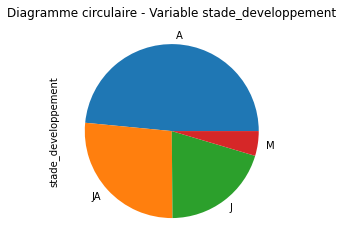

In [429]:
data["stade_developpement"].value_counts(normalize=True).plot(kind='pie').set_title("Diagramme circulaire - Variable stade_developpement")

In [431]:
data["stade_developpement"].value_counts(normalize=True)

A     0.484744
JA    0.266633
J     0.202637
M     0.045986
Name: stade_developpement, dtype: float64

On a presque la moitié d'arbre qui sont adultes à Paris. Mais on a très peu d'arbre mature.

### Conclusion de l'analyse sur les variables qualitatives

A retravailler

Nous avons remarqué que les données étaient assez dispersées au sein des variables qualitatives.
C'est pour cela, que nous avons crée un regroupement "Autres". Ceci nous permettra d'expliquer au mieux la diversification des espèces d'arbres qui se trouvent à Paris.

Nous avons aussi dû supprimé des variables qui n'apportaient aucune information supplémentaire. Par exemple la colonne "variété" contenait beaucoup de valeurs manquantes.
Mais nous avons aussi supprimé des données car certains arbres ne se trouvaient pas à Paris, mais dans d'autres départements comme le Val-de-Marne, par exemple.

Nous avons aussi découvert que les variables espèces, genre et libelle_français apportaient surement la même information. Il faudrait donc en garder qu'une seule. Nous vérifirons cette hypothèse lors de l'analyse multivariée.

Nous appris que la majorité des arbres étaient des Platanes, mais qu'il y a quand même une grande diversification des espèces.
On sait aussi que la plupart des arbres sont adultes et qu'il existe très peu d'arbre mature. Ces informations sont surement à prendre en compte pour optimiser les tourner.

Il convient à présent de visualiser nos données sur une carte afin de voir si nous pouvons en apprendre plus sur notre jeu de données. Nous pourrions par exemple, savoir si certaines espèces d'arbres sont regroupées au sud ou nord, par exemple.

## 3) Visualisation des données sur la carte de Paris

Le but étant d'obtenir une information supplémentaire sur la manière dont nos données sont réparties.

In [500]:
paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)

In [501]:
paris

In [502]:
geo = json.load(open("arrondissements.geojson"))

In [505]:
len(geo["features"])

20

In [512]:
data = data.loc[data['arrondissement']!='VAL-DE-MARNE']
data = data.loc[data['arrondissement']!='SEINE-SAINT-DENIS']
data = data.loc[data['arrondissement']!='HAUTS-DE-SEINE']
data = data.loc[data['arrondissement']!='BOIS DE BOULOGNE']
data = data.loc[data['arrondissement']!='BOIS DE VINCENNES']

In [513]:
data['arrondissement'].unique()

array(['PARIS 7E ARRDT', 'PARIS 17E ARRDT', 'PARIS 16E ARRDT',
       'PARIS 4E ARRDT', 'PARIS 13E ARRDT', 'PARIS 12E ARRDT',
       'PARIS 19E ARRDT', 'PARIS 14E ARRDT', 'PARIS 15E ARRDT',
       'PARIS 3E ARRDT', 'PARIS 20E ARRDT', 'PARIS 18E ARRDT',
       'PARIS 6E ARRDT', 'PARIS 11E ARRDT', 'PARIS 1ER ARRDT',
       'PARIS 2E ARRDT', 'PARIS 5E ARRDT', 'PARIS 9E ARRDT',
       'PARIS 10E ARRDT', 'PARIS 8E ARRDT'], dtype=object)

In [514]:
data['arrondissement_num'] = data['arrondissement']
data['arrondissement_num'] = data['arrondissement_num'].str.replace('PARIS','')

data['arrondissement_num'] = data['arrondissement_num'].str.replace('ARRDT', '')
data['arrondissement_num'] = data['arrondissement_num'].str.replace('ER', '')
data['arrondissement_num'] = data['arrondissement_num'].str.replace('E', '')
data['arrondissement_num'] = data['arrondissement_num'].str.replace(' ', '')


In [515]:
data['arrondissement_num'].unique()

array(['7', '17', '16', '4', '13', '12', '19', '14', '15', '3', '20',
       '18', '6', '11', '1', '2', '5', '9', '10', '8'], dtype=object)

In [516]:
data['arrondissement_num']=pd.to_numeric(data['arrondissement_num'])

In [517]:
df = pd.DataFrame({
    "Arrondissement" : [arr["properties"]["c_ar"] for arr in geo["features"]], 
    "Surface" : [arr["properties"]["surface"] for arr in geo["features"]]
})
df

,Arrondissement,Surface
0,16,1.637254e+07
1,19,6.792651e+06
2,3,1.170883e+06
3,11,3.665442e+06
4,5,2.539375e+06
5,6,2.153096e+06
6,9,2.178303e+06
7,20,5.983446e+06
8,15,8.494994e+06
9,2,9.911537e+05


In [518]:
data_counts = data.groupby('arrondissement_num').size().reset_index(name='counts')
data_counts

,arrondissement_num,counts
0,1,1410
1,2,539
2,3,1205
3,4,2718
4,5,2298
5,6,1749
6,7,8517
7,8,7184
8,9,1163
9,10,3167


In [519]:
data_counts

,arrondissement_num,counts
0,1,1410
1,2,539
2,3,1205
3,4,2718
4,5,2298
5,6,1749
6,7,8517
7,8,7184
8,9,1163
9,10,3167


In [523]:
paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
folium.Choropleth(geo_data = geo, key_on = "feature.properties.c_ar",
                 data = data_counts, columns = ["arrondissement_num", "counts"],
                 fill_color = "YlOrRd").add_to(paris)
paris

In [524]:
paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
folium.Choropleth(geo_data = geo, key_on = "feature.properties.c_ar",
                 data = data, columns = ["arrondissement_num", "hauteur_cm"],
                 fill_color = "YlOrRd").add_to(paris)
paris

In [525]:
paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
folium.Choropleth(geo_data = geo, key_on = "feature.properties.c_ar",
                 data = data, columns = ["arrondissement_num", "circonference_cm"],
                 fill_color = "YlOrRd").add_to(paris)
paris

In [528]:
paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
folium.Choropleth(geo_data = geo, key_on = "feature.properties.c_ar",
                 data = data, columns = ["arrondissement_num", "hauteur_cm"],
                 fill_color = "YlOrRd").add_to(paris)
paris

In [497]:
data_espece = data.groupby(['espece', 'arrondissement_num']).size().reset_index(name='counts')
data_espece

,espece,arrondissement_num,counts
0,Autres,1,257
1,Autres,10,920
2,Autres,11,955
3,Autres,12,2374
4,Autres,13,4509
...,...,...,...
432,x hispanica,5,989
433,x hispanica,6,786
434,x hispanica,7,1835
435,x hispanica,8,2032


Grâce à l'analyse précédente, nous avons appris qu'une majorité des arbres étaient regroupées dans certaines catégories.
Regardons ces statistiques.

In [466]:
data['espece'].value_counts(normalize=True)

Autres            0.226342
x hispanica       0.198998
hippocastanum     0.106465
japonica          0.062352
tomentosa         0.049940
n. sp.            0.047173
platanoides       0.030714
pseudoplatanus    0.029084
x carnea          0.024416
nigra             0.023383
x europaea        0.021724
australis         0.020369
cordata           0.019433
occidentalis      0.019094
colurna           0.016459
excelsior         0.015856
betulus           0.015621
calleryana        0.014720
pseudoacacia      0.012664
orientalis        0.012171
platyphyllos      0.011625
serrulata         0.010713
baccata           0.010684
Name: espece, dtype: float64

Illustrons les 3 premières catégories sur une carte.

In [471]:
paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
info_autres = data_espece[data_espece['espece']=='Autres']
info_hisp = data_espece[data_espece['espece']=='x hispanica']
info_hipp = data_espece[data_espece['espece']=='hippocastanum']
info_jap = data_espece[data_espece['espece']=='japonica']


In [498]:
m = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)

choropleth = folium.Choropleth(
    geo_data=geo,
    data=info_autres,
    columns = ["arrondissement_num", "counts"],
    key_on = "feature.properties.c_ar",
    fill_color="YlGn",
    name="Autres",
    show=False,
).add_to(m)

choropleth2 = folium.Choropleth(
    geo_data=geo,
    data=info_hisp,
    columns = ["arrondissement_num", "counts"],
    key_on = "feature.properties.c_ar",
    fill_color="PuRd",
    name="X Hispanica",
    show=False,
).add_to(m)

choropleth3 = folium.Choropleth(
    geo_data=geo,
    data=info_hipp,
    columns = ["arrondissement_num", "counts"],
    key_on = "feature.properties.c_ar",
    fill_color="YlOrRd",
    name="Hippocastanum",
    show=False,
).add_to(m)

choropleth4 = folium.Choropleth(
    geo_data=geo,
    data=info_jap,
    columns = ["arrondissement_num", "counts"],
    key_on = "feature.properties.c_ar",
    fill_color="BuPu",
    name="Japonica",
    show=False,
).add_to(m)

# The underlying GeoJson and StepColormap objects are reachable
print(type(choropleth.geojson))
print(type(choropleth.color_scale))

folium.LayerControl(collapsed=False).add_to(m)

m

<class 'folium.features.GeoJson'>
<class 'branca.colormap.StepColormap'>


# Synthèse de l’analyse de données

A faire////

Grâce à notre étude, nous avons pu en apprendre beaucoup plus sur nos données.
Premièrement, nous avons pu nettoyer notre jeu de données en supprimant les données manquantes et aberrantes. 
Mais nous avons pu grâce aux analyses de chaque colonnes, decouvrir les colonnes qui n'apportaient aucune information supplémentaire.

Prochaines étapes est de faire une analyse bivariée et multivariée afin de détecter les éventuels liens entre nos données.
Nous pourrions par exemple regarder les corrélations grâce à des nuages de point pour commencer et faire des tests statistiques par la suite.
Voici un exemple :

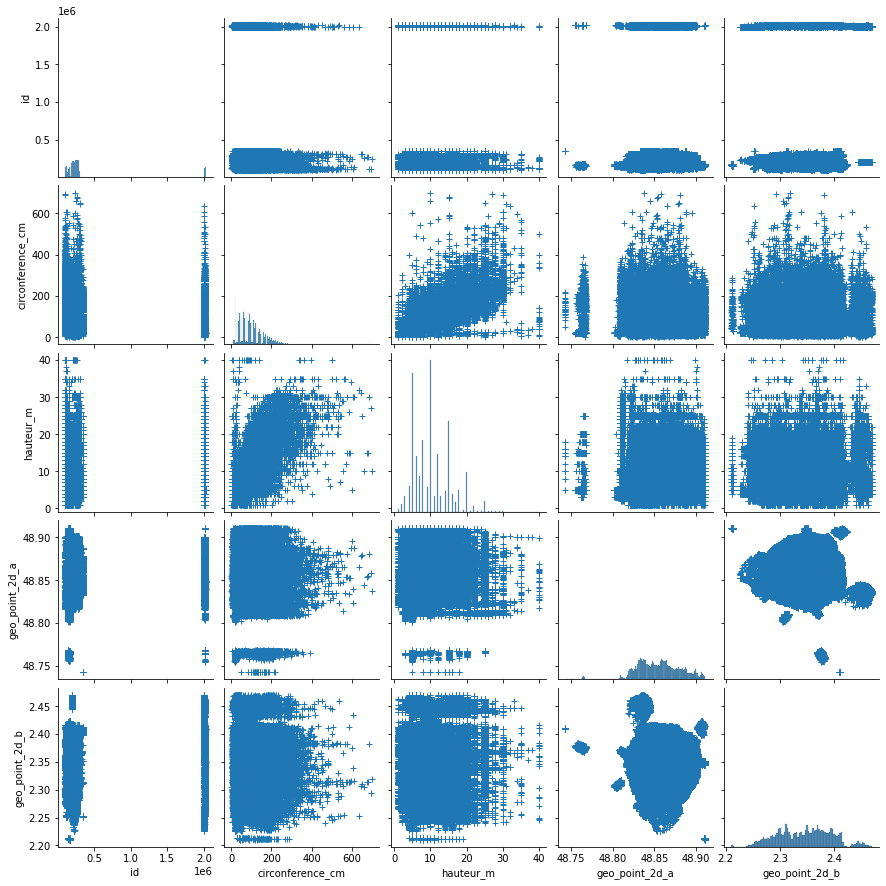

In [210]:
sns.pairplot(data, plot_kws=dict(marker="+", linewidth=1))


In [ ]:

La hauteur et la circonférence des arbres semble liées : 
Plus un arbre est fin et plus il est haut . Plus un arbre est gros et plus il est haut.

On peut aussi observer la carte de paris avec le croisement des points geo a et b.